In [2]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd



In [1]:
import requests
from bs4 import BeautifulSoup

# Step 1: Define the URL of the website (Books to Scrape)
url = "http://books.toscrape.com/"

# Step 2: Send a GET request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36"
}
response = requests.get(url, headers=headers)

# Step 3: Check if the request was successful
if response.status_code == 200:
    print("Successfully fetched the webpage!")
else:
    print(f"Failed to fetch the page. Status Code: {response.status_code}")
    exit()

# Step 4: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Step 5: Print and inspect the HTML structure
print("\nFirst 500 characters of HTML content:\n")
print(response.text[:500])  # Print only first 500 characters for readability

# Step 6: Print webpage title to verify content is loaded
print("\nPage Title:", soup.title.text)


Successfully fetched the webpage!

First 500 characters of HTML content:

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->
    <head>
        <title>
    All products | Books to Scrape - Sandbox
</title>

        <meta http-equiv="content-type" content="text/html; charset=UTF-8" /

Page Title: 
    All products | Books to Scrape - Sandbox



In [12]:
# Define the eBay iPhone search URL
url = "https://www.ebay.com/sch/i.html?_nkw=iphone"

# Set headers to mimic a real browser request and avoid bot detection
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

# Send a GET request to fetch the page
response = requests.get(url, headers=headers)

# Check if request was successful
if response.status_code == 200:
    print("Successfully fetched the eBay page!\n")
    
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all product listings on the page
    listings = soup.find_all("li", class_="s-item")

    # Define an empty list to store extracted iPhone data
    iphone_data = []

    for item in listings:
        try:
            # i. Extract product details
            name = item.find("h3", class_="s-item__title")  # Product Name
            price = item.find("span", class_="s-item__price")  # Price
            rating = item.find("div", class_="x-star-rating")  # Ratings
            reviews = item.find("span", class_="s-item__reviews-count")  # Number of Reviews
            status = item.find("span", class_="SECONDARY_INFO")  # Availability

            # ii. Append extracted details to the list
            iphone_data.append({
                "Product Name": name.text if name else "N/A",
                "Price": price.text if price else "N/A",
                "Ratings": rating.text if rating else "N/A",
                "Number of Reviews": reviews.text if reviews else "N/A",
                "Availability": status.text if status else "Available"
            })
        
        except Exception as e:
            print(f"Error extracting data: {e}")

    # Convert extracted data into a Pandas DataFrame
    df = pd.DataFrame(iphone_data)

    # Save the DataFrame as a CSV file
    df.to_csv("ebay_iphone_listings.csv", index=False)

    # Print the first 5 rows of the dataset
    print(df.head())

    # Confirm that data is saved
    print("\n Data saved to ebay_iphone_listings.csv!")

else:
    print(" Failed to fetch eBay page. Status Code:", response.status_code)


Successfully fetched the eBay page!

  Product Name               Price              Ratings  \
0          N/A              $20.00                  N/A   
1          N/A              $20.00                  N/A   
2          N/A  $154.95 to $254.95  5.0 out of 5 stars.   
3          N/A    $27.00 to $58.00                  N/A   
4          N/A  $289.95 to $379.95  5.0 out of 5 stars.   

                                   Number of Reviews             Availability  
0                                                N/A                Brand New  
1                                                N/A                Brand New  
2  27 product ratings - Apple iPhone X XR XS XS M...  Very Good - Refurbished  
3                                                N/A                Pre-Owned  
4  9 product ratings - Apple iPhone 13 | 13 mini ...  Very Good - Refurbished  

 Data saved to ebay_iphone_listings.csv!


In [11]:
# Check if request was successful
if response.status_code == 200:
    print(" Successfully fetched the eBay page!\n")

    # Parse HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all product listings on the page
    listings = soup.find_all("li", class_="s-item")

    # Define an empty list to store extracted iPhone data
    iphone_data = []

    for index, item in enumerate(listings):
        try:
            # i. Extract product details with error handling
            name_tag = item.find("h3", class_="s-item__title")
            price_tag = item.find("span", class_="s-item__price")
            rating_tag = item.find("div", class_="x-star-rating")  # Ratings
            reviews_tag = item.find("span", class_="s-item__reviews-count")  # Number of Reviews
            status_tag = item.find("span", class_="SECONDARY_INFO")  # Availability

            # i. Handle missing data with appropriate messages
            name = name_tag.text.strip() if name_tag else " Product Name Missing"
            price = price_tag.text.strip() if price_tag else " Price Not Listed"
            rating = rating_tag.text.strip() if rating_tag else "N/A"  # Some listings may not have ratings
            reviews = reviews_tag.text.strip() if reviews_tag else "0 Reviews"
            status = status_tag.text.strip() if status_tag else "Available"

            # iii. Print a warning for missing data
            if "❌" in (name, price):
                print(f"⚠️ Warning: Missing data in listing {index + 1}")

            # Append extracted details to the list
            iphone_data.append({
                "Product Name": name,
                "Price": price,
                "Ratings": rating,
                "Number of Reviews": reviews,
                "Availability": status
            })
        
        except Exception as e:
            print(f" Error extracting data from listing {index + 1}: {e}")

    # Convert extracted data into a Pandas DataFrame
    df = pd.DataFrame(iphone_data)

    # Save the DataFrame as a CSV file
    df.to_csv("ebay_iphone_listings_errHandling.csv", index=False)

    # iii. Print the first 5 rows of the dataset
    print(df.head())

    # Confirm that data is saved
    print("\n Data successfully saved to ebay_iphone_listings.csv!")

else:
    print(" Failed to fetch eBay page. Status Code:", response.status_code)


 Successfully fetched the eBay page!

            Product Name               Price              Ratings  \
0   Product Name Missing              $20.00                  N/A   
1   Product Name Missing              $20.00                  N/A   
2   Product Name Missing  $154.95 to $254.95  5.0 out of 5 stars.   
3   Product Name Missing    $27.00 to $58.00                  N/A   
4   Product Name Missing  $289.95 to $379.95  5.0 out of 5 stars.   

                                   Number of Reviews             Availability  
0                                          0 Reviews                Brand New  
1                                          0 Reviews                Brand New  
2  27 product ratings - Apple iPhone X XR XS XS M...  Very Good - Refurbished  
3                                          0 Reviews                Pre-Owned  
4  9 product ratings - Apple iPhone 13 | 13 mini ...  Very Good - Refurbished  

 Data successfully saved to ebay_iphone_listings.csv!


In [10]:
# iv. Check if request was successful
if response.status_code == 200:
    print(" Successfully fetched the eBay page!\n")
    
    # Parse HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all product listings on the page
    listings = soup.find_all("li", class_="s-item")

    # i. Define an empty list to store extracted iPhone data
    iphone_data = []

    for index, item in enumerate(listings):
        try:
            # Extract product details with error handling
            name_tag = item.find("h3", class_="s-item__title")
            price_tag = item.find("span", class_="s-item__price")
            rating_tag = item.find("div", class_="x-star-rating")  # Ratings
            reviews_tag = item.find("span", class_="s-item__reviews-count")  # Number of Reviews
            status_tag = item.find("span", class_="SECONDARY_INFO")  # Availability

            # Handle missing data with appropriate messages
            name = name_tag.text.strip() if name_tag else " Product Name Missing"
            price = price_tag.text.strip() if price_tag else " Price Not Listed"
            rating = rating_tag.text.strip() if rating_tag else "N/A"  # Some listings may not have ratings
            reviews = reviews_tag.text.strip() if reviews_tag else "0 Reviews"
            status = status_tag.text.strip() if status_tag else "Available"

            # Print a warning for missing data
            if "❌" in (name, price):
                print(f" Warning: Missing data in listing {index + 1}")

            # Append extracted details to the list
            iphone_data.append({
                "Product Name": name,
                "Price": price,
                "Ratings": rating,
                "Number of Reviews": reviews,
                "Availability": status
            })
        
        except Exception as e:
            print(f" Error extracting data from listing {index + 1}: {e}")

    # i. Convert extracted data into a Pandas DataFrame
    df = pd.DataFrame(iphone_data)

    # ii. Save the DataFrame as a CSV file
    df.to_csv("iphones_data.csv", index=False)

    # Print the first 5 rows of the dataset
    print(df.head())

    # Confirm that data is saved
    print("\n Data successfully saved to iphones_data.csv!")

else:
    print(" Failed to fetch eBay page. Status Code:", response.status_code)


 Successfully fetched the eBay page!

            Product Name               Price              Ratings  \
0   Product Name Missing              $20.00                  N/A   
1   Product Name Missing              $20.00                  N/A   
2   Product Name Missing  $154.95 to $254.95  5.0 out of 5 stars.   
3   Product Name Missing    $27.00 to $58.00                  N/A   
4   Product Name Missing  $289.95 to $379.95  5.0 out of 5 stars.   

                                   Number of Reviews             Availability  
0                                          0 Reviews                Brand New  
1                                          0 Reviews                Brand New  
2  27 product ratings - Apple iPhone X XR XS XS M...  Very Good - Refurbished  
3                                          0 Reviews                Pre-Owned  
4  9 product ratings - Apple iPhone 13 | 13 mini ...  Very Good - Refurbished  

 Data successfully saved to iphones_data.csv!


 Scraping page 1...
 Scraping page 2...
 Scraping page 3...
 Scraping page 4...
 Scraping page 5...

 Data successfully saved to iphones_data_multi.csv!

 Performing Exploratory Data Analysis...


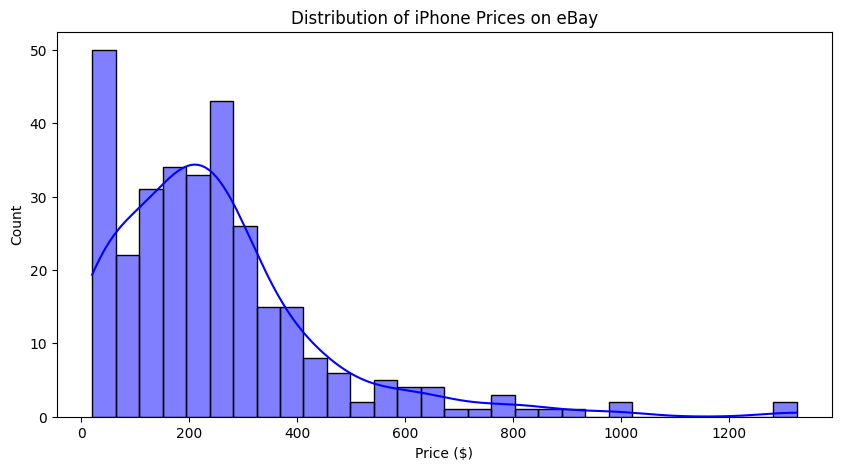


 Average iPhone Price: $246.72
 Average iPhone Rating: 3.4/5

 Top 5 Most Expensive iPhones:
     Product Name  Price ($)  Ratings  Number of Reviews Availability
37       No Name    1325.00      5.0                2.0    Brand New
170      No Name    1325.00      5.0                2.0    Brand New
74       No Name     989.95      5.0                2.0    Brand New
210      No Name     989.95      5.0                2.0    Brand New
271      No Name     899.00      0.0                0.0     Open Box

 Top 5 Most Reviewed iPhones:
     Product Name  Price ($)  Ratings  Number of Reviews Availability
274      No Name      35.00      4.5              582.0    Pre-Owned
287      No Name      68.99      4.5              560.0     Open Box
51       No Name      30.00      4.5              442.0    Pre-Owned
277      No Name      25.00      4.5              442.0    Pre-Owned
38       No Name      26.00      4.0              425.0    Pre-Owned


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

# Function to extract iPhone details from a given eBay page
def scrape_ebay_iphones(page_num=1):
    url = f"https://www.ebay.com/sch/i.html?_nkw=iphone&_pgn={page_num}"

    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        listings = soup.find_all("li", class_="s-item")

        iphone_data = []
        for index, item in enumerate(listings):
            try:
                name_tag = item.find("h3", class_="s-item__title")
                price_tag = item.find("span", class_="s-item__price")
                rating_tag = item.find("div", class_="x-star-rating")
                reviews_tag = item.find("span", class_="s-item__reviews-count")
                status_tag = item.find("span", class_="SECONDARY_INFO")

                name = name_tag.text.strip() if name_tag else " No Name"
                price_text = price_tag.text.strip() if price_tag else " No Price"
                rating = rating_tag.text.strip() if rating_tag else "N/A"
                reviews = reviews_tag.text.strip() if reviews_tag else "0 Reviews"
                status = status_tag.text.strip() if status_tag else "Available"

                # Extract numeric price (remove symbols)
                price_match = re.search(r"\d+[\.,]?\d*", price_text.replace(",", ""))
                price = float(price_match.group()) if price_match else None

                iphone_data.append({
                    "Product Name": name,
                    "Price ($)": price,
                    "Ratings": rating,
                    "Number of Reviews": reviews,
                    "Availability": status
                })

            except Exception as e:
                print(f" Error extracting data on page {page_num}, listing {index + 1}: {e}")

        return iphone_data

    else:
        print(f" Failed to fetch page {page_num}. Status Code: {response.status_code}")
        return []

# Scrape multiple pages (5 pages for demonstration)
all_iphone_data = []
for page in range(1, 6):
    print(f" Scraping page {page}...")
    all_iphone_data.extend(scrape_ebay_iphones(page))
    time.sleep(2)  # Pause to avoid bot detection

# Convert to DataFrame & Save to CSV
df = pd.DataFrame(all_iphone_data)
df.to_csv("iphones_data_multi.csv", index=False)
print("\n Data successfully saved to iphones_data_multi.csv!")

# ---------------------------------------------------------
# Task 6: Perform Basic Exploratory Data Analysis (EDA)
# ---------------------------------------------------------

print("\n Performing Exploratory Data Analysis...")

# Drop rows with missing price values
df = df.dropna(subset=["Price ($)"])

# Convert "Number of Reviews" to numeric
df["Number of Reviews"] = df["Number of Reviews"].str.extract(r'(\d+)').astype(float).fillna(0)

# Convert "Ratings" to numeric (if available)
df["Ratings"] = df["Ratings"].str.extract(r'(\d+\.\d+)').astype(float).fillna(0)

# Price Distribution Plot
plt.figure(figsize=(10, 5))
sns.histplot(df["Price ($)"], bins=30, kde=True, color="blue")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.title("Distribution of iPhone Prices on eBay")
plt.show()

# Average Price & Rating
avg_price = df["Price ($)"].mean()
avg_rating = df["Ratings"].mean()
print(f"\n Average iPhone Price: ${avg_price:.2f}")
print(f" Average iPhone Rating: {avg_rating:.1f}/5")

# Top 5 Most Expensive iPhones
print("\n Top 5 Most Expensive iPhones:\n", df.nlargest(5, "Price ($)"))

# Top 5 Most Reviewed iPhones
print("\n Top 5 Most Reviewed iPhones:\n", df.nlargest(5, "Number of Reviews"))
